### Clustering
Is grouping data points together based on similarities <br/>
among them and differences from others. <br/>
Can be used for a) Market Segmentation b) Image Segmentation <br/>

Cluster Analysis is a multivariate statistical technique that groups observations <br/>
on the basis some of their features or variables they are described by <br/>

### K-Means Clustering<br/>

k-means model places a circle (or, in higher dimensions, a hyper-sphere) <br/>
at the center of each cluster, with a radius defined by the most distant point in the cluster <br/>

1. Choose the number of clusters (done by Data Scientist knowledge)<br/>
2. Specify the cluster center (centroid : It is the mean position of a group of points)<br/>
3. Assign each point to a centroid<br/>
4. Adjust the centroids<br/>


In [24]:
%%time
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

Wall time: 997 µs


In [25]:
data = load_iris()


In [5]:
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<function matplotlib.pyplot.show(close=None, block=None)>

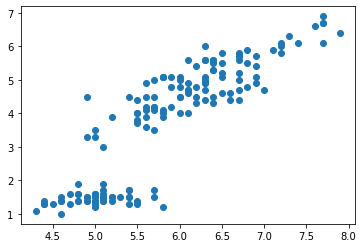

In [6]:
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'])
plt.show

In [42]:
my_model = KMeans(n_clusters=3)
df = df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)','petal width (cm)']]
y_predicted = my_model.fit_predict(df)

In [43]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [44]:
df['y_predicted'] = y_predicted

In [45]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_predicted
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
df1= df[df.y_predicted==0]
df2= df[df.y_predicted==1]
df3= df[df.y_predicted==2]



In [47]:
my_model.cluster_centers_.shape 

(3, 4)

In [48]:
my_model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

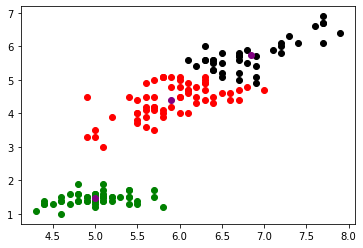

In [49]:
plt.scatter(df1['sepal length (cm)'], df1['petal length (cm)'], color='green')
plt.scatter(df2['sepal length (cm)'], df2['petal length (cm)'], color='red')
plt.scatter(df3['sepal length (cm)'], df3['petal length (cm)'], color='black')
plt.scatter(my_model.cluster_centers_ [:,0], my_model.cluster_centers_ [:,2], color='purple')
#plt.xlabel('sepal length (cm)')
#plt.ylabel('petal length (cm)')
#plt.legend()

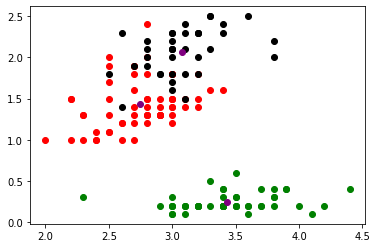

In [50]:
plt.scatter(df1['sepal width (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['sepal width (cm)'], df2['petal width (cm)'], color='red')
plt.scatter(df3['sepal width (cm)'], df3['petal width (cm)'], color='black')
plt.scatter(my_model.cluster_centers_ [:,1], my_model.cluster_centers_ [:,3], color='purple')
# plt.xlabel('sepalwidth')
#plt.ylabel('petalwidth')
# plt.legend()

In [51]:
# We want Sum of Squares (sse) to be as low as possible for a small number of clusters for N observations
k_range = range(1,20)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    #km.fit(df[['sepal length (cm)','petal length (cm)','sepal width (cm)','sepal width (cm)']])
    km.fit(df[['sepal length (cm)','petal length (cm)']])
    sse.append(km.inertia_)

In [52]:
sse

[566.4937333333332,
 112.99207175925925,
 53.80997864410694,
 34.31702077922079,
 25.639459375524602,
 21.939722955422962,
 18.355225707201356,
 15.039189852545128,
 13.389926406926412,
 11.783444979350152,
 10.48189366791649,
 9.131015754713125,
 8.08639382874637,
 7.62107354033165,
 6.782763161168329,
 6.122564748469914,
 5.518389319014316,
 5.489440836940835,
 5.11943376068376]

In [63]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [64]:
# Finding the elbow of the curve using an algotithm
from kneed import KneeLocator
kn = KneeLocator(k_range, sse, curve='convex', direction='decreasing')
print(kn.knee)

3


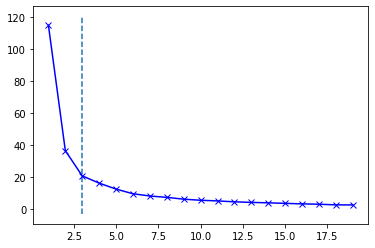

In [65]:
plt.plot(k_range, sse,'bx-' )
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [54]:
k_range = range(1,20)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)    
    km.fit(df[['sepal width (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [55]:
sse

[114.87686666666673,
 36.40900000000001,
 20.602395953664498,
 16.074698935226277,
 12.351666160350376,
 9.427407877335222,
 8.024892454024538,
 7.167990906784549,
 6.036644406554894,
 5.354168668749552,
 4.942786921411924,
 4.37377687348883,
 4.019329938250604,
 3.745839549339547,
 3.427508333333333,
 3.0934716810966782,
 2.8754134492958023,
 2.4751174242424243,
 2.432816919191918]

In [66]:
# Finding the elbow of the curve using an algotithm
# more options : https://stackoverflow.com/questions/51762514/find-the-elbow-point-on-an-optimization-curve-with-python
from kneed import KneeLocator
kn = KneeLocator(k_range, sse, curve='convex', direction='decreasing')
print(kn.knee)

3


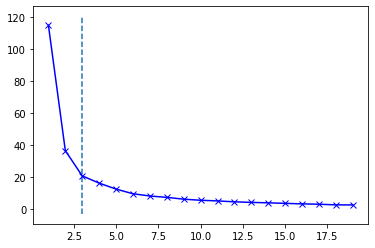

In [67]:
plt.plot(k_range, sse, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [57]:
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_predicted,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,1,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


Text(0.5, 1.0, 'K_Means')

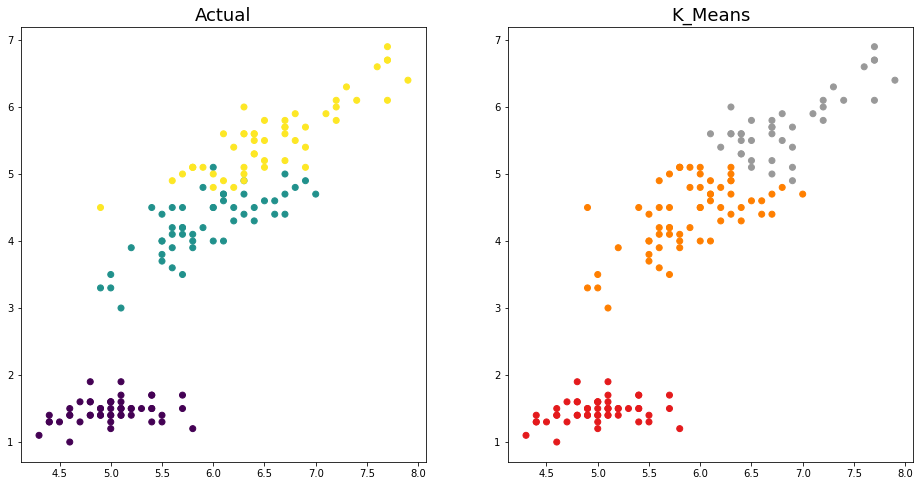

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df['target'])
axes[1].scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df['y_predicted'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

In [59]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(df['target'], df['y_predicted'])
cm

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [60]:
print(accuracy_score(df['target'], df['y_predicted']))

0.8933333333333333


In [61]:
# Another method to get the best number of cluster is using silhouette score
%%time
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3).fit_predict(df)
print(silhouette_score(df,kmeans))

0.605851643017776
Wall time: 26.9 ms
